### 🧪 Anomaly Detection Methods with Visualization
This notebook demonstrates three common statistical methods for detecting anomalies in reliability or maintenance data:
- **IQR (Interquartile Range)**
- **Z-score**
- **MAD (Median Absolute Deviation)**

We will use a simple example dataset: downtime durations (in hours).

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Sample data (downtime durations)
data = [5, 6, 5, 7, 6, 6, 5, 100]  # 100 looks suspicious

#### 1️⃣ IQR Method

In [7]:
sorted_data = sorted(data)
q1 = np.percentile(sorted_data, 25)
q3 = np.percentile(sorted_data, 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers_iqr = [x for x in data if x < lower_bound or x > upper_bound]
print(f"IQR: {iqr:.2f}")
print(f"Bounds: [{lower_bound}, {upper_bound}]")
print("IQR Outliers:", outliers_iqr)

IQR: 1.25
Bounds: [3.125, 8.125]
IQR Outliers: [100]


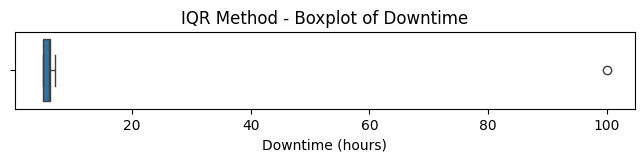

In [8]:
plt.figure(figsize=(8, 1))
sns.boxplot(x=data)
plt.title("IQR Method - Boxplot of Downtime")
plt.xlabel("Downtime (hours)")
plt.show()

#### 2️⃣ Z-score Method

In [9]:
mean = np.mean(data)
std = np.std(data)
zscores = [(x - mean) / std for x in data]
outliers_z = [x for x, z in zip(data, zscores) if abs(z) > 2]
print(f"Mean: {mean:.2f}, Std Dev: {std:.2f}")
print("Z-scores:", np.round(zscores, 2))
print("Z-score Outliers:", outliers_z)

Mean: 17.50, Std Dev: 31.19
Z-scores: [-0.4  -0.37 -0.4  -0.34 -0.37 -0.37 -0.4   2.65]
Z-score Outliers: [100]


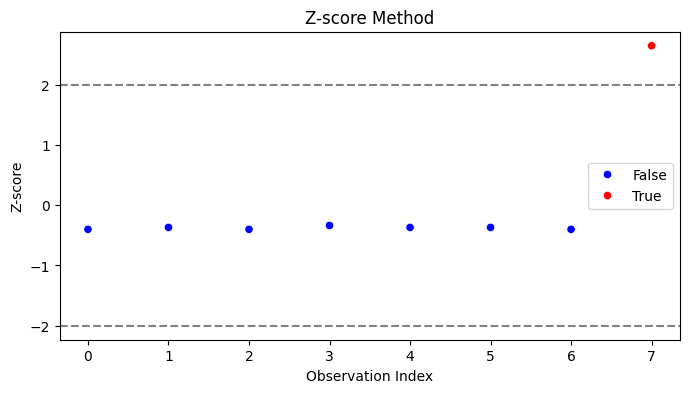

In [10]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x=range(len(data)), y=zscores, hue=[abs(z) > 2 for z in zscores], palette=['blue', 'red'])
plt.axhline(2, ls='--', color='gray')
plt.axhline(-2, ls='--', color='gray')
plt.title("Z-score Method")
plt.ylabel("Z-score")
plt.xlabel("Observation Index")
plt.show()

#### 3️⃣ MAD Method (Robust)

In [11]:
median = np.median(data)
abs_deviation = [abs(x - median) for x in data]
mad = np.median(abs_deviation)
mod_z_scores = [0.6745 * (x - median) / mad if mad != 0 else 0 for x in data]
outliers_mad = [x for x, mz in zip(data, mod_z_scores) if abs(mz) > 3.5]
print(f"Median: {median}, MAD: {mad}")
print("Modified Z-scores:", np.round(mod_z_scores, 2))
print("MAD Outliers:", outliers_mad)

Median: 6.0, MAD: 1.0
Modified Z-scores: [-0.67  0.   -0.67  0.67  0.    0.   -0.67 63.4 ]
MAD Outliers: [100]


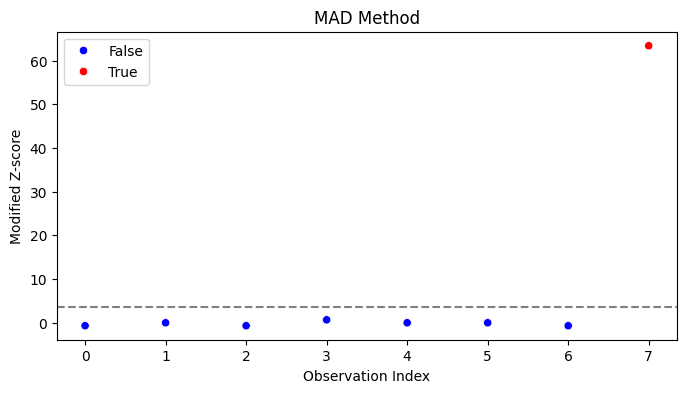

In [12]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x=range(len(data)), y=mod_z_scores, hue=[abs(mz) > 3.5 for mz in mod_z_scores], palette=['blue', 'red'])
plt.axhline(3.5, ls='--', color='gray')
plt.title("MAD Method")
plt.ylabel("Modified Z-score")
plt.xlabel("Observation Index")
plt.show()

#### ✅ Summary
These methods help detect anomalies such as unexpected downtime spikes or sensor failures in maintenance data.

- Use **IQR** for simple, range-based detection.
- Use **Z-score** when the data is normally distributed.
- Use **MAD** for robust anomaly detection when outliers are present.

**Example Insight:** The value `100` is flagged by all three methods as an anomaly due to its large deviation from typical downtime values.